In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from pathlib import Path

# Análise dos terceirizados ativos

## Criar um dataframe apenas com os terceirizados ativos

In [2]:
df_terceirizados = pd.read_csv("../extracao_dados/terceirizados_consolidados.csv", dtype=str)

In [3]:
df_terceirizados.head()

,Órgão,Unidade Gestora,Fornecedor,Número Contrato,CPF,Nome,Função,Descrição Complementar,Jornada Semanal,Unidade,Custo do posto,Auxílio Trasporte,Vale Alimentação,Escolaridade,Data Início,Data Fim,Situação
0,26266 - FUNDACAO UNIVERSIDADE FEDERAL DO PAMPA,154359 - UNIPAMPA,10.439.655/0001-14 - PHENIX SOLUCOES LTDA,00003/2017,***.043.350-**,DANIEL SOARES DE ALMEIDA,Almoxarife,NaN,30,BAGÉ,"R$ 2.239,48","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,05/12/2018,NaN,Ativo
1,63000 - ADVOCACIA-GERAL DA UNIAO,110097 - SAD4R/AGU,13.697.422/0001-00 - GED PRESTADORA DE SERVICO...,00012/2020,***.566.379-**,ALESSANDRA LOPES FERREIRA,Agente administrativo,NaN,40,EA FOZ DO IGUAÇU/ AGU/PR,"R$ 3.535,06","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,28/07/2021,NaN,Ativo
2,30203 - INSTIT.NAC. DE METROLOG. QUALID. E TEC...,183039 - SURRS,04.321.961/0002-30 - BRAVHA SERVICOS LTDA,00018/2021,***.518.920-**,DARLEN PATRÍCIA VIANA DOS SANTOS,Auxiliar de Limpeza,SERVENTE DE LIMPEZA,40,SURRS/NUADM,"R$ 4.086,76","R$ 4,80","R$ 22,00",03 – Ensino Fundamental Incompleto,25/09/2023,27/09/2023,Inativo
3,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.763.787-**,EVERTON DOS SANTOS SILVA,Oficial de manutenção predial,AUXILIAR - MANUTENÇÃO CIVIL - ELÉTRICA / MEIO-...,44,COGIC,"R$ 6.220,25","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo
4,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.863.497-**,IREMAR ROQUE DA CRUZ,Oficial de manutenção predial,OFICIAL - MANUTENÇÃO CIVIL - PEDREIRO,44,COGIC,"R$ 6.671,02","R$ 0,00","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo


In [4]:
df_terceirizados.columns

Index(['Órgão', 'Unidade Gestora', 'Fornecedor', 'Número Contrato', 'CPF',
       'Nome', 'Função', 'Descrição Complementar', 'Jornada Semanal',
       'Unidade', 'Custo do posto', 'Auxílio Trasporte', 'Vale Alimentação',
       'Escolaridade', 'Data Início', 'Data Fim', 'Situação'],
      dtype='object')

In [5]:
df_terceirizados.shape

(49091, 17)

In [6]:
# Normalizar todos os nomes de funções para padronizar a grafia
# Remove espaços e padroniza capitalização
df_terceirizados['Função'] = df_terceirizados['Função'].str.strip().str.title()

In [7]:
df_ativos = df_terceirizados[df_terceirizados['Situação'].str.strip().str.upper() == 'ATIVO'].copy()

In [8]:
df_ativos.shape

(39466, 17)

In [9]:
df_ativos.head()

,Órgão,Unidade Gestora,Fornecedor,Número Contrato,CPF,Nome,Função,Descrição Complementar,Jornada Semanal,Unidade,Custo do posto,Auxílio Trasporte,Vale Alimentação,Escolaridade,Data Início,Data Fim,Situação
0,26266 - FUNDACAO UNIVERSIDADE FEDERAL DO PAMPA,154359 - UNIPAMPA,10.439.655/0001-14 - PHENIX SOLUCOES LTDA,00003/2017,***.043.350-**,DANIEL SOARES DE ALMEIDA,Almoxarife,NaN,30,BAGÉ,"R$ 2.239,48","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,05/12/2018,NaN,Ativo
1,63000 - ADVOCACIA-GERAL DA UNIAO,110097 - SAD4R/AGU,13.697.422/0001-00 - GED PRESTADORA DE SERVICO...,00012/2020,***.566.379-**,ALESSANDRA LOPES FERREIRA,Agente Administrativo,NaN,40,EA FOZ DO IGUAÇU/ AGU/PR,"R$ 3.535,06","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,28/07/2021,NaN,Ativo
3,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.763.787-**,EVERTON DOS SANTOS SILVA,Oficial De Manutenção Predial,AUXILIAR - MANUTENÇÃO CIVIL - ELÉTRICA / MEIO-...,44,COGIC,"R$ 6.220,25","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo
4,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.863.497-**,IREMAR ROQUE DA CRUZ,Oficial De Manutenção Predial,OFICIAL - MANUTENÇÃO CIVIL - PEDREIRO,44,COGIC,"R$ 6.671,02","R$ 0,00","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo
5,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.294.847-**,OCTAVIO PASCOAL ALVES PINTO,Oficial De Manutenção Predial,OFICIAL - MANUTENÇÃO CIVIL - ELÉTRICA - PLANTÃ...,44,COGIC,"R$ 7.732,94","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo


## Distribuição das funções

In [10]:
df_ativos['Função'].value_counts() 

Vigilante                     5553
Auxiliar De Limpeza           4713
Limpeza E Conservação         4162
Assistente Administrativo     3029
Auxiliar Administrativo       2856
                              ... 
Adestrador De Animais            1
Lavadeiro Em Geral               1
Analista De Mídias Sociais       1
Tapeceiro                        1
Técnico Agropecuário             1
Name: Função, Length: 167, dtype: int64

In [11]:
# Agrupa por função e conta os registros
top_funcoes = (
    df_ativos['Função']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'Função', 'Função': 'Quantidade'})
)

In [12]:
top_funcoes

,Função,Quantidade
0,Vigilante,5553
1,Auxiliar De Limpeza,4713
2,Limpeza E Conservação,4162
3,Assistente Administrativo,3029
4,Auxiliar Administrativo,2856
5,"Recepcionista, Em Geral",2532
6,Auxiliar De Serviços Diversos,1445
7,Motorista,1441
8,Porteiro,1052
9,Vigia,979


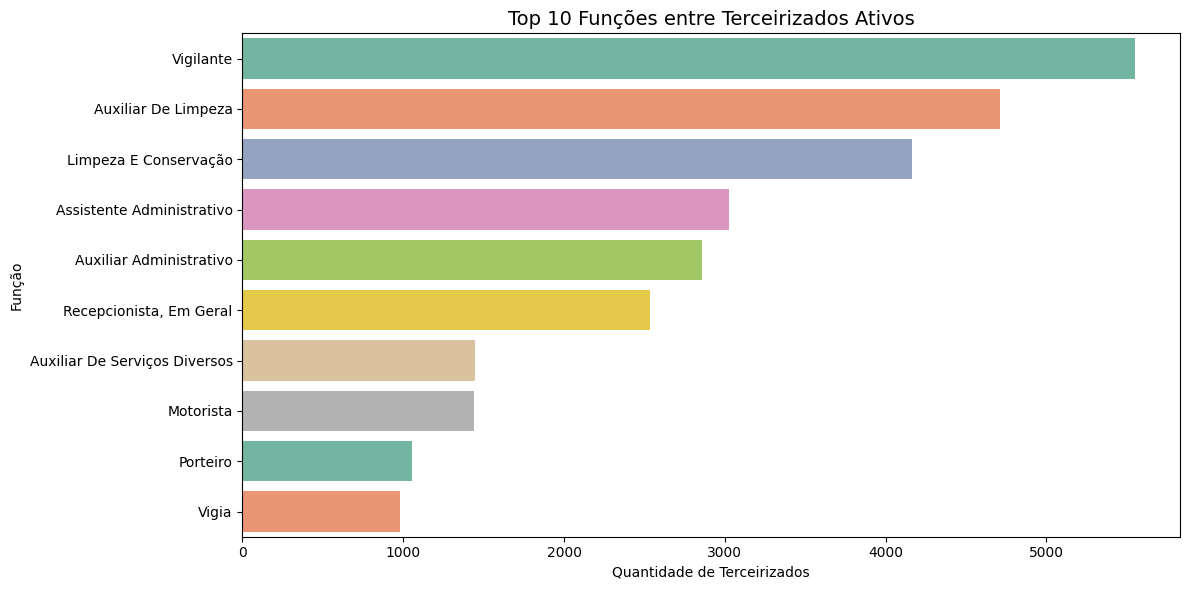

In [13]:
# Cria o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_funcoes, y='Função', x='Quantidade', hue='Função', palette='Set2', legend=False)
plt.title("Top 10 Funções entre Terceirizados Ativos", fontsize=14)
plt.xlabel("Quantidade de Terceirizados")
plt.ylabel("Função")

plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/top_10_funcoes.png", dpi=300)  # Salva em alta resolução

plt.show()

## Analisar o salário e as funções

Não há informação sobre salário nessa base do Contratos Gov, então vamos cruzar com o histórico da CGU.

In [14]:
# Caminho da pasta com os arquivos
pasta_terceirizados = Path("../../previsao_contratacao/data/terceirizados")

In [15]:
# Anos que você quer tratar
anos = [2019, 2020, 2021, 2022, 2023]

# Criar um dicionário para armazenar os dataframes por ano
dfs_por_ano = {}

In [16]:
# Iterar pelos arquivos
for arquivo in pasta_terceirizados.glob("terceirizados_*.csv"):
    nome_arquivo = arquivo.name
    try:
        ano = int(nome_arquivo.split("_")[1][:4])
    except Exception as e:
        print(f"❌ Erro ao extrair ano de {nome_arquivo}: {e}")
        continue

    if ano in anos:
        print(f"📄 Lendo: {nome_arquivo}")
        try:
            df = pd.read_csv(arquivo, sep=";", encoding="latin1", low_memory=False, dtype=str)
        except UnicodeDecodeError as e:
            print(f"⚠️ Erro de encoding em {nome_arquivo}: {e}")
            continue

        if ano not in dfs_por_ano:
            dfs_por_ano[ano] = []
        dfs_por_ano[ano].append(df)

📄 Lendo: terceirizados_202101.csv
📄 Lendo: terceirizados_202301.csv
📄 Lendo: terceirizados_202305.csv
📄 Lendo: terceirizados_202105.csv
📄 Lendo: terceirizados_202201.csv
📄 Lendo: terceirizados_202001.csv
📄 Lendo: terceirizados_201905.csv
📄 Lendo: terceirizados_201901.csv
📄 Lendo: terceirizados_202005.csv
📄 Lendo: terceirizados_202205.csv
📄 Lendo: terceirizados_202209.csv
📄 Lendo: terceirizados_202009.csv
📄 Lendo: terceirizados_201909.csv
📄 Lendo: terceirizados_202109.csv
📄 Lendo: terceirizados_202309.csv


In [17]:
# Concatenar os dataframes por ano
for ano, lista_dfs in dfs_por_ano.items():
    globals()[f"df_{ano}"] = pd.concat(lista_dfs, ignore_index=True)
    print(f"✅ df_{ano} criado com {len(globals()[f'df_{ano}'])} linhas.")

✅ df_2021 criado com 220032 linhas.
✅ df_2023 criado com 233936 linhas.
✅ df_2022 criado com 229810 linhas.
✅ df_2020 criado com 228724 linhas.
✅ df_2019 criado com 276554 linhas.


In [18]:
# Caminho da pasta com os arquivos de 2024
pasta_dados = Path("../data")

In [19]:
# Seleciona todos os arquivos que seguem o padrão terceirizados2024*.xlsx
arquivos_2024 = sorted(pasta_dados.glob("terceirizados2024*.xlsx"))

In [20]:
# Lê cada arquivo como string
dfs_2024 = []
for arquivo in arquivos_2024:
    df = pd.read_excel(arquivo, dtype=str)
    dfs_2024.append(df)

In [21]:
# Concatena todos os dataframes
df_2024 = pd.concat(dfs_2024, ignore_index=True)

In [22]:
# Remover duplicatas
df_2024 = df_2024.drop_duplicates()

In [23]:
df_historico = pd.read_csv("../../previsao_contratacao/data/historico_cgu/terceirizados-2010-2023.csv", sep=";", dtype=str, low_memory=False)

In [24]:
df_historico_atualizado = pd.concat([df_historico, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)

In [25]:
df_historico_atualizado = df_historico_atualizado.drop_duplicates()

In [26]:
df_historico_atualizado.columns

Index(['id_terc', 'sg_orgao_sup_tabela_ug', 'cd_ug_gestora', 'nm_ug_tabela_ug',
       'sg_ug_gestora', 'nr_contrato', 'nr_cnpj', 'nm_razao_social', 'nr_cpf',
       'nm_terceirizado', 'nm_categoria_profissional', 'nm_escolaridade',
       'nr_jornada', 'nm_unidade_prestacao', 'vl_mensal_salario',
       'vl_mensal_custo', 'Num_Mes_Carga', 'Mes_Carga', 'Ano_Carga',
       'sg_orgao', 'nm_orgao', 'cd_orgao_siafi', 'cd_orgao_siape',
       'ï»¿id_terc'],
      dtype='object')

In [27]:
df_historico_atualizado.head()

,id_terc,sg_orgao_sup_tabela_ug,cd_ug_gestora,nm_ug_tabela_ug,sg_ug_gestora,nr_contrato,nr_cnpj,nm_razao_social,nr_cpf,nm_terceirizado,...,vl_mensal_salario,vl_mensal_custo,Num_Mes_Carga,Mes_Carga,Ano_Carga,sg_orgao,nm_orgao,cd_orgao_siafi,cd_orgao_siape,ï»¿id_terc
0,1,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.140.291-**,CAMILA FERNANDA ROCHA DE SOUSA,...,502.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000,NaN
1,2,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.338.161-**,DEILTON ALVES SANTANA,...,502.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000,NaN
2,3,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.532.161-**,GLEIDES MARIA DE SOUSA,...,940.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000,NaN
3,4,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.694.231-**,DINIS ALVES DE OLIVEIRA,...,940.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000,NaN
4,5,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.049.961-**,ELIETE DUARTE,...,940.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000,NaN


In [28]:
df_ativos.columns

Index(['Órgão', 'Unidade Gestora', 'Fornecedor', 'Número Contrato', 'CPF',
       'Nome', 'Função', 'Descrição Complementar', 'Jornada Semanal',
       'Unidade', 'Custo do posto', 'Auxílio Trasporte', 'Vale Alimentação',
       'Escolaridade', 'Data Início', 'Data Fim', 'Situação'],
      dtype='object')

In [29]:
# Pegar o salário mais recente por CPF no histórico
df_salario_por_cpf = (
    df_historico_atualizado
    .dropna(subset=['nr_cpf', 'vl_mensal_salario'])
    .sort_values(['nr_cpf', 'Ano_Carga'], ascending=[True, False])
    .drop_duplicates(subset=['nr_cpf'])  # mantém apenas o mais recente por CPF
    [['nr_cpf', 'vl_mensal_salario']]    # só mantém essas colunas
)

In [30]:
# Faz o merge com df_ativos usando apenas CPF
df_ativos_com_salario = df_ativos.merge(
    df_salario_por_cpf,
    left_on='CPF',
    right_on='nr_cpf',
    how='left'
).drop(columns=['nr_cpf'])  # remove duplicata de coluna de CPF

# Resultado final com salário preenchido quando houver
df_ativos_com_salario.head()

,Órgão,Unidade Gestora,Fornecedor,Número Contrato,CPF,Nome,Função,Descrição Complementar,Jornada Semanal,Unidade,Custo do posto,Auxílio Trasporte,Vale Alimentação,Escolaridade,Data Início,Data Fim,Situação,vl_mensal_salario
0,26266 - FUNDACAO UNIVERSIDADE FEDERAL DO PAMPA,154359 - UNIPAMPA,10.439.655/0001-14 - PHENIX SOLUCOES LTDA,00003/2017,***.043.350-**,DANIEL SOARES DE ALMEIDA,Almoxarife,NaN,30,BAGÉ,"R$ 2.239,48","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,05/12/2018,NaN,Ativo,924.0
1,63000 - ADVOCACIA-GERAL DA UNIAO,110097 - SAD4R/AGU,13.697.422/0001-00 - GED PRESTADORA DE SERVICO...,00012/2020,***.566.379-**,ALESSANDRA LOPES FERREIRA,Agente Administrativo,NaN,40,EA FOZ DO IGUAÇU/ AGU/PR,"R$ 3.535,06","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,28/07/2021,NaN,Ativo,NaN
2,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.763.787-**,EVERTON DOS SANTOS SILVA,Oficial De Manutenção Predial,AUXILIAR - MANUTENÇÃO CIVIL - ELÉTRICA / MEIO-...,44,COGIC,"R$ 6.220,25","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo,10101
3,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.863.497-**,IREMAR ROQUE DA CRUZ,Oficial De Manutenção Predial,OFICIAL - MANUTENÇÃO CIVIL - PEDREIRO,44,COGIC,"R$ 6.671,02","R$ 0,00","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo,1764
4,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.294.847-**,OCTAVIO PASCOAL ALVES PINTO,Oficial De Manutenção Predial,OFICIAL - MANUTENÇÃO CIVIL - ELÉTRICA - PLANTÃ...,44,COGIC,"R$ 7.732,94","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo,2899


### Top 10 funções com o maior quantitativo

In [31]:
funcoes_top10 = top_funcoes['Função'].tolist()

In [32]:
funcoes_top10

['Vigilante',
 'Auxiliar De Limpeza',
 'Limpeza E Conservação',
 'Assistente Administrativo',
 'Auxiliar Administrativo',
 'Recepcionista, Em Geral',
 'Auxiliar De Serviços Diversos',
 'Motorista',
 'Porteiro',
 'Vigia']

In [33]:
# Filtra apenas essas funções
df_top_funcoes_salario = df_ativos_com_salario[
    df_ativos_com_salario['Função'].isin(funcoes_top10)
]

In [34]:
df_top_funcoes_salario['vl_mensal_salario'] = (
    df_top_funcoes_salario['vl_mensal_salario']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(r'[^\d\.]', '', regex=True)  # remove caracteres não numéricos
    .replace('', np.nan)                      # substitui strings vazias por NaN
    .astype(float)
)

/var/folders/44/wjzjf_412m1cl66j1pj3b0_00000gn/T/ipykernel_14425/1283081169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_funcoes_salario['vl_mensal_salario'] = (


In [35]:
# Agrupa por função e calcula a mediana do salário
df_mediana_salario = (
    df_top_funcoes_salario
    .groupby('Função')['vl_mensal_salario']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)

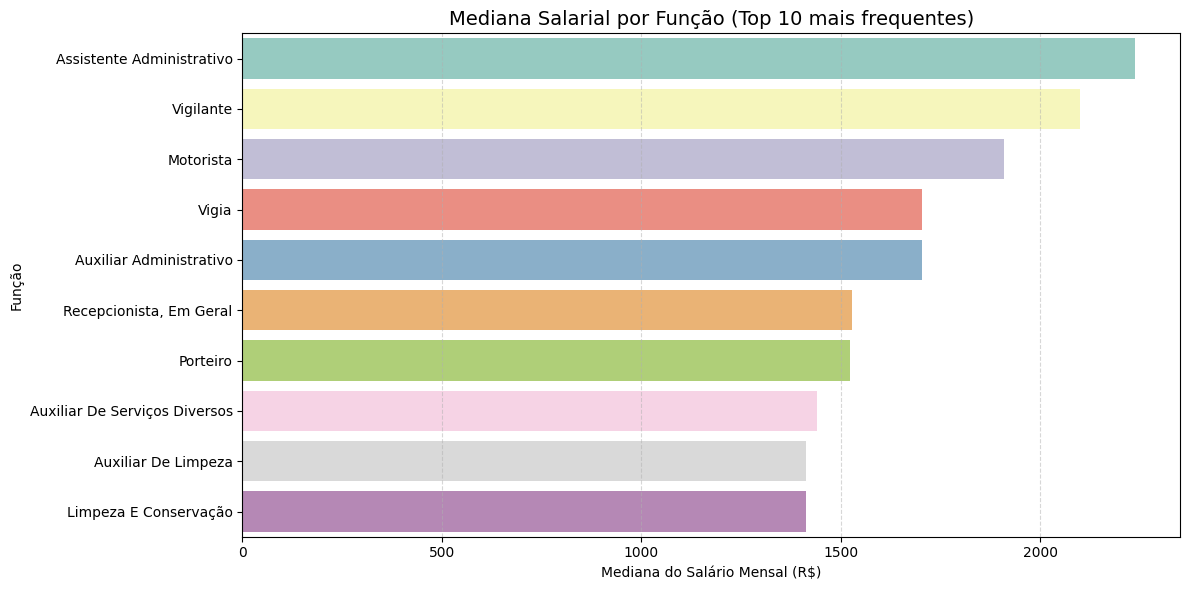

In [36]:
# Criação do gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_mediana_salario,
    x='vl_mensal_salario',
    y='Função',
    hue='Função',
    palette='Set3',
    legend=False
)

plt.title('Mediana Salarial por Função (Top 10 mais frequentes)', fontsize=14)
plt.xlabel('Mediana do Salário Mensal (R$)')
plt.ylabel('Função')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/mediana_salarial_ativos.png", dpi=300)  # Salva em alta resolução

plt.show()

### Carga horária x Salário mensal

#### Top 10 categorias com o maior quantitativo de ativos

Para cálculo do valor da hora da categoria, vamos multiplicar por 4.33 porque é uma média de semana por mês considerando 12 meses. O cálculo ficará assim:

valor_hora = vl_mensal_salario / (Jornada Semanal x 4.33)

In [37]:
df_top_funcoes_salario['Jornada Semanal'] = pd.to_numeric(
    df_top_funcoes_salario['Jornada Semanal'], errors='coerce'
)

/var/folders/44/wjzjf_412m1cl66j1pj3b0_00000gn/T/ipykernel_14425/3578268577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_funcoes_salario['Jornada Semanal'] = pd.to_numeric(


In [38]:
# Calcula as medianas por função
df_mediana_salario = (
    df_top_funcoes_salario
    .groupby('Função', as_index=False)['vl_mensal_salario']
    .median()
    .rename(columns={'vl_mensal_salario': 'mediana_salario'})
)

df_mediana_jornada = (
    df_top_funcoes_salario
    .groupby('Função', as_index=False)['Jornada Semanal']
    .median()
    .rename(columns={'Jornada Semanal': 'mediana_jornada'})
)

In [39]:
# Junta e calcula o valor/hora
df_valor_hora_top10 = df_mediana_salario.merge(df_mediana_jornada, on='Função')
df_valor_hora_top10['valor_hora'] = (
    df_valor_hora_top10['mediana_salario'] / (df_valor_hora_top10['mediana_jornada'] * 4.33)
)

# Ordena para visualização
df_valor_hora_top10 = df_valor_hora_top10.sort_values('valor_hora', ascending=False)

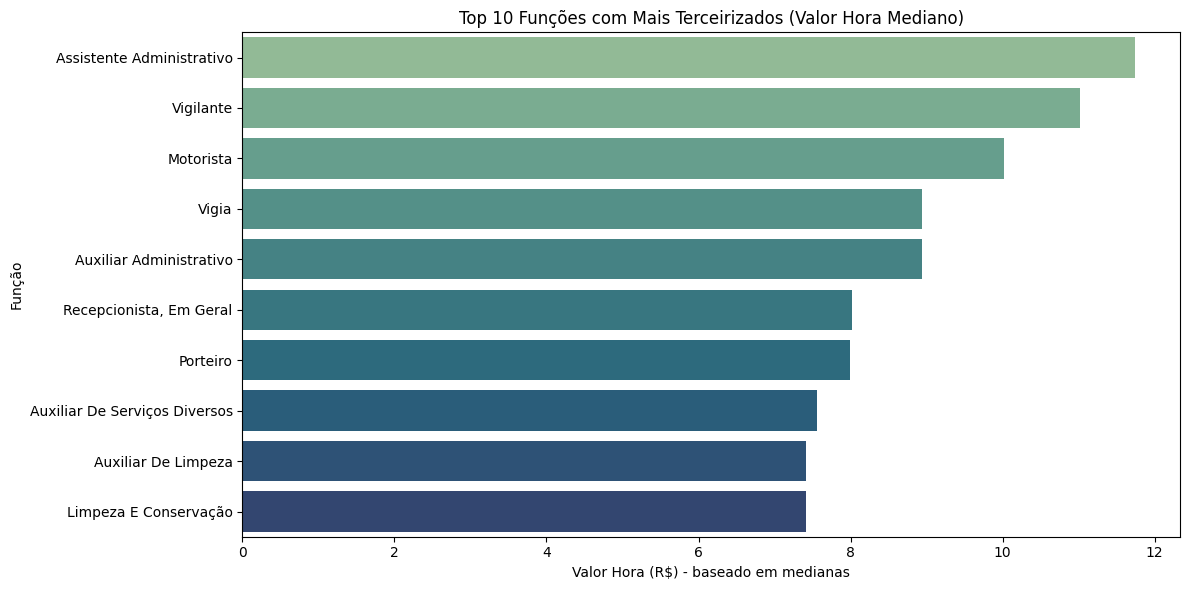

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_valor_hora_top10,
    x='valor_hora',
    y='Função',
    palette='crest',
    hue='Função',
    legend=False
)
plt.xlabel("Valor Hora (R$) - baseado em medianas")
plt.ylabel("Função")
plt.title("Top 10 Funções com Mais Terceirizados (Valor Hora Mediano)")
plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/mediana_valor_hora_top_10.png", dpi=300)  # Salva em alta resolução

plt.show()

#### Dos maiores salários mensais

In [41]:
# Converte 'vl_mensal_salario' para float, caso ainda não esteja
df_ativos_com_salario['vl_mensal_salario'] = (
    df_ativos_com_salario['vl_mensal_salario']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(r'[^\d\.]', '', regex=True)
    .replace('', np.nan)  # trata campos vazios
    .astype(float)
)

In [42]:
# Converte Jornada Semanal para float
df_ativos_com_salario['Jornada Semanal'] = (
    df_ativos_com_salario['Jornada Semanal']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(r'[^\d\.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

In [43]:
# Calcula mediana salarial por função
df_mediana_salario = (
    df_ativos_com_salario
    .groupby('Função', as_index=False)['vl_mensal_salario']
    .median()
    .rename(columns={'vl_mensal_salario': 'mediana_salario'})
)

# Calcula mediana da jornada semanal por função
df_mediana_jornada = (
    df_ativos_com_salario
    .groupby('Função', as_index=False)['Jornada Semanal']
    .median()
    .rename(columns={'Jornada Semanal': 'mediana_jornada'})
)

# Junta os dois
df_funcoes_valor_hora = df_mediana_salario.merge(df_mediana_jornada, on='Função')

In [44]:
# Calcula valor/hora com base nas medianas
df_funcoes_valor_hora['valor_hora'] = (
    df_funcoes_valor_hora['mediana_salario'] / (df_funcoes_valor_hora['mediana_jornada'] * 4.33)
)

# Seleciona as top 10 por valor/hora
df_top_valor_hora = df_funcoes_valor_hora.sort_values('valor_hora', ascending=False).head(10)

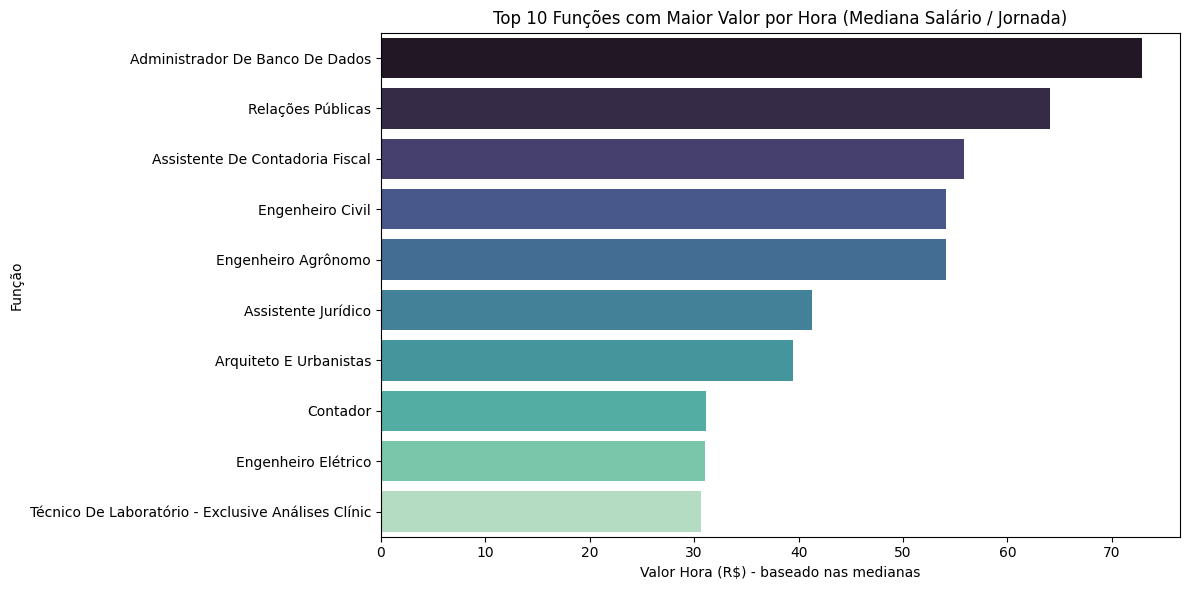

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_valor_hora, x='valor_hora', y='Função', hue='Função', palette='mako', legend=False)
plt.xlabel("Valor Hora (R$) - baseado nas medianas")
plt.ylabel("Função")
plt.title("Top 10 Funções com Maior Valor por Hora (Mediana Salário / Jornada)")
plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/top_10_mediana_valor_hora.png", dpi=300)  # Salva em alta resolução

plt.show()

## Analisar a rotatividade e a permanência nos postos

### Calcular o tempo de permanência no posto

In [46]:
# Converte datas
df_terceirizados['Data Início'] = pd.to_datetime(df_terceirizados['Data Início'], errors='coerce', dayfirst=True)
df_terceirizados['Data Fim'] = pd.to_datetime(df_terceirizados['Data Fim'], errors='coerce', dayfirst=True)
df_ativos['Data Início'] = pd.to_datetime(df_ativos['Data Início'], errors='coerce', dayfirst=True)

In [47]:
# Filtra inativos
df_inativos = df_terceirizados[df_terceirizados['Situação'] != 'Ativo'].copy()

In [48]:
# Calcula tempo de permanência em dias
df_inativos['dias_permanencia'] = (df_inativos['Data Fim'] - df_inativos['Data Início']).dt.days

# Converte para anos, meses, etc. se necessário
df_inativos['anos_permanencia'] = df_inativos['dias_permanencia'] / 365.25

In [49]:
# Calcula tempo de permanência até a data atual
df_ativos['dias_permanencia'] = (pd.to_datetime('today') - df_ativos['Data Início']).dt.days
df_ativos['anos_permanencia'] = df_ativos['dias_permanencia'] / 365.25

In [50]:
# Veja que há datas futuras que impactam na análise de permanência
df_negativos = df_ativos[df_ativos['dias_permanencia'] < 0][['Nome', 'Função', 'Data Início', 'Data Fim', 'dias_permanencia']]
print(df_negativos)

                                    Nome                      Função  \
5065          ELIZAMA OLIVEIRA DE FARIAS       Agente Administrativo   
12343             RENAN OLIVEIRA PEREIRA       Limpeza E Conservação   
12678          ANA ARLETE ROCHA DA SILVA       Limpeza E Conservação   
12697           ANA PAULA DUARTE BOCORNE         Auxiliar De Limpeza   
19093      WELDEMBERG DOS SANTOS SANTANA     Auxiliar Administrativo   
21782           LUCIA REGINA DE OLIVEIRA         Auxiliar De Limpeza   
42581                YARA CRISTINA COSTA     Recepcionista, Em Geral   
45103        IRANILTO SOARES DE OLIVEIRA         Auxiliar De Limpeza   
46646  SERGIO FABIANO ALCANTARA DE SOUZA   Assistente Administrativo   
47227             RAFAEL DE SOUZA BARROS                      Pintor   
47551           LUCIANA PEREIRA DA SILVA  Encarregado Administrativo   
49039   MILTON RICARDO SILVEIRA DE MOURA                       Vigia   
49083         DERYK KAUA TEODORO SANTANA     Recepcionista, Em G

In [51]:
hoje = pd.to_datetime(datetime.today().date())
df_ativos = df_ativos[pd.to_datetime(df_ativos['Data Início'], errors='coerce') <= hoje]
df_inativos = df_inativos[pd.to_datetime(df_inativos['Data Início'], errors='coerce') <= hoje]

In [52]:
# Filtra os casos inconsistentes de inativos que possuem data início maior do que a data fim
inconsistentes = df_inativos[df_inativos['Data Início'] > df_inativos['Data Fim']]

# Visualiza a quantidade de casos
print(f"Registros inconsistentes: {len(inconsistentes)}")

Registros inconsistentes: 34


In [53]:
# Exclui do dataframe principal os casos inconsistentes
df_inativos = df_inativos[df_inativos['Data Início'] <= df_inativos['Data Fim']]

### Identificar os postos com maior rotatividade

In [54]:
# Verifica se há Data Fim ausente em inativos (pode indicar erro de preenchimento)
faltando_data_fim = df_inativos['Data Fim'].isna().sum()
print(f"Inativos sem data fim: {faltando_data_fim}")

Inativos sem data fim: 0


In [55]:
# Retirar casos em que dias_permanencia = 0
df_inativos = df_inativos[df_inativos['dias_permanencia'] != 0]

In [62]:
top_funcoes_menor_tempo = (
    df_inativos
    .groupby('Função')['dias_permanencia']
    .median()
    .sort_values()
    .head(15)
    .reset_index()
)

In [63]:
top_funcoes_menor_tempo

,Função,dias_permanencia
0,Zelador,36.5
1,"Técnicos Em Secretariado, Taquígrafos E Esteno...",59.0
2,Técnico De Áudio (Rádio),59.0
3,Supervisor Técnico (Mídias Audiovisuais),65.0
4,Editor De Tv E Vídeo,66.0
5,Tradutor-Intérprete De Libras,69.0
6,Técnico Em Eletrônica,71.0
7,Auxiliar De Logística,76.0
8,Comunicador De Mídias Audiovisuais,77.5
9,Encanador,81.0


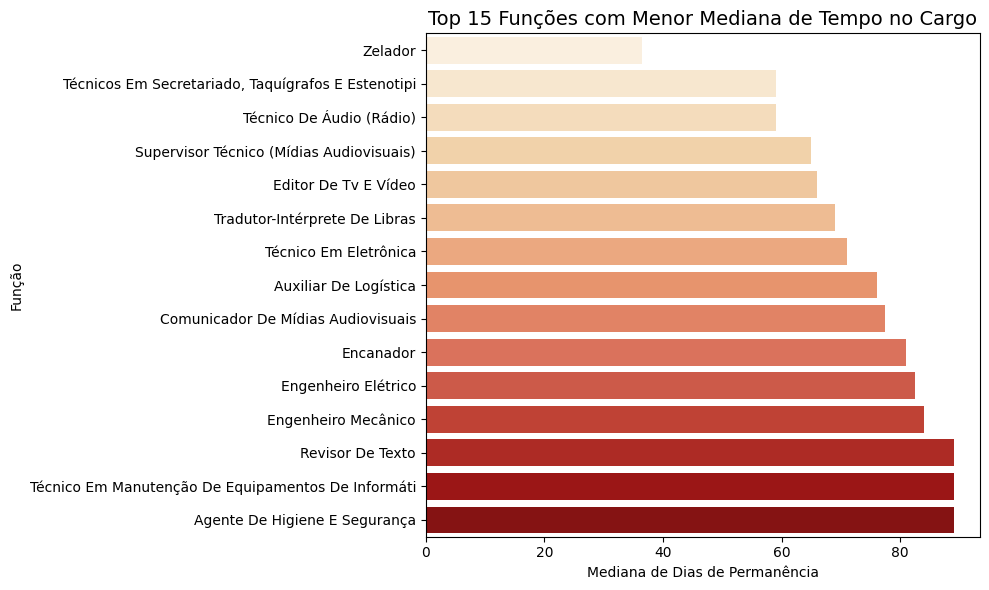

In [95]:
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais
sns.barplot(
    data=top_funcoes_menor_tempo,
    y='Função',
    x='dias_permanencia',
    hue='Função',
    legend=False,
    palette='OrRd'
)

plt.title("Top 15 Funções com Menor Mediana de Tempo no Cargo", fontsize=14)
plt.xlabel("Mediana de Dias de Permanência")
plt.ylabel("Função")

plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/top_15_menor_mediana_tempo.png", dpi=300)  # Salva em alta resolução

plt.show()

### Identificar os postos com menor rotatividade

In [66]:
top_funcoes_maior_tempo = (
    df_inativos
    .groupby('Função')['dias_permanencia']
    .median()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

In [67]:
top_funcoes_maior_tempo

,Função,dias_permanencia
0,Bombeiro Hidráulico,1541.5
1,Técnico De Suporte De Ti,1327.0
2,Operador De Maquinas Agrícolas,1232.0
3,Marceneiro,1129.0
4,Auxiliar De Serviços Diversos,1088.5
5,Chefe De Brigada,850.0
6,Operador De Caldeira,847.0
7,Monitor De Sistemas Eletrônicos De Segurança I...,846.0
8,Lavador De Carro,767.0
9,Psicólogo,744.0


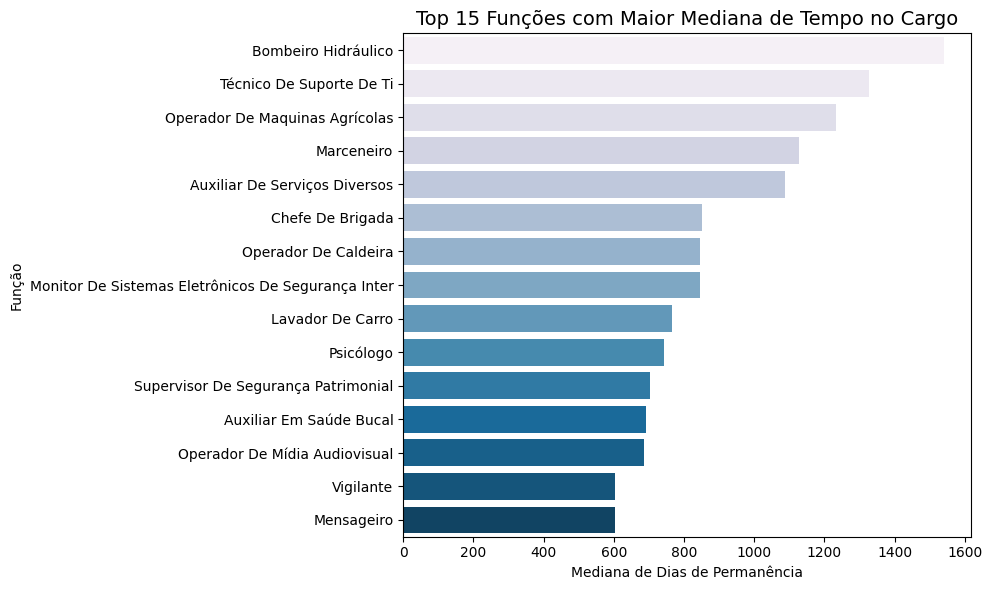

In [96]:
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontais
sns.barplot(
    data=top_funcoes_maior_tempo,
    y='Função',
    x='dias_permanencia',
    hue='Função',
    legend=False,
    palette='PuBu'
)

plt.title("Top 15 Funções com Maior Mediana de Tempo no Cargo", fontsize=14)
plt.xlabel("Mediana de Dias de Permanência")
plt.ylabel("Função")

plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/top_15_maior_mediana_tempo.png", dpi=300)  # Salva em alta resolução

plt.show()

### Analisar o tempo de permanência das funções com maior quantitativo de contratados

In [85]:
df_top_inativos = df_inativos[df_inativos['Função'].isin(funcoes_top10)].copy()

In [86]:
# Calcula o tempo de permanência em meses
df_top_inativos['tempo_meses'] = (
    (df_top_inativos['Data Fim'] - df_top_inativos['Data Início']) / np.timedelta64(1, 'M')
).round(1)

In [87]:
df_tempo_funcao = (
    df_top_inativos
    .groupby('Função')['tempo_meses']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)

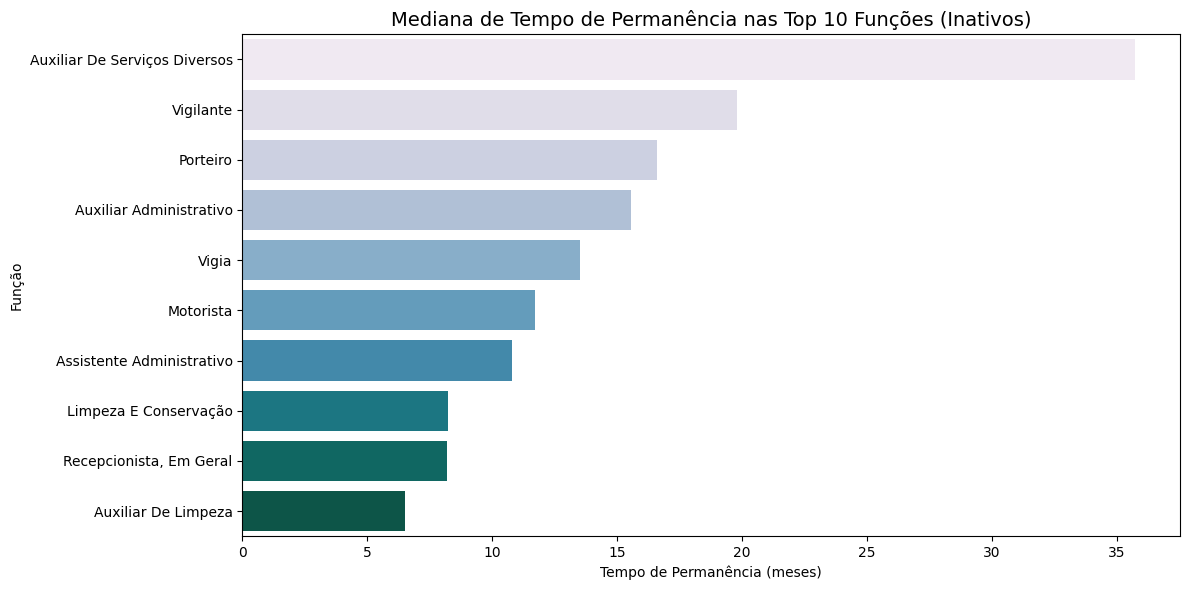

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_tempo_funcao, x='tempo_meses', y='Função', hue='Função', palette='PuBuGn', legend=False)

plt.title("Mediana de Tempo de Permanência nas Top 10 Funções (Inativos)", fontsize=14)
plt.xlabel("Tempo de Permanência (meses)")
plt.ylabel("Função")

plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/top_10_funcoes_mediana_tempo.png", dpi=300)  # Salva em alta resolução

plt.show()

### Correlação entre tempo de permanência e mediana salarial

In [101]:
# Faz o merge com df_ativos usando apenas CPF
df_inativos_com_salario = df_inativos.merge(
    df_salario_por_cpf,
    left_on='CPF',
    right_on='nr_cpf',
    how='left'
).drop(columns=['nr_cpf'])  # remove duplicata de coluna de CPF

# Resultado final com salário preenchido quando houver
df_inativos_com_salario.head()

,Órgão,Unidade Gestora,Fornecedor,Número Contrato,CPF,Nome,Função,Descrição Complementar,Jornada Semanal,Unidade,...,Auxílio Trasporte,Vale Alimentação,Escolaridade,Data Início,Data Fim,Situação,dias_permanencia,anos_permanencia,tempo_meses,vl_mensal_salario
0,30203 - INSTIT.NAC. DE METROLOG. QUALID. E TEC...,183039 - SURRS,04.321.961/0002-30 - BRAVHA SERVICOS LTDA,00018/2021,***.518.920-**,DARLEN PATRÍCIA VIANA DOS SANTOS,Auxiliar De Limpeza,SERVENTE DE LIMPEZA,40,SURRS/NUADM,...,"R$ 4,80","R$ 22,00",03 – Ensino Fundamental Incompleto,2023-09-25,2023-09-27,Inativo,2.0,0.005476,0.1,1500.4000244140625
1,22000 - MINISTÉRIO DA AGRICULTURA E PECUÁRIA,130029 - SFA/BA/MAPA,13.566.782/0001-72 - CK CONSTRUTORA E SERVICOS...,00002/2023,***.437.475-**,ROSE MARY SANTOS DOS ANJOS,Auxiliar Administrativo,411005,44,SFPA-BA,...,"R$ 10,40","R$ 17,00",06 – Ensino Médio Completo,2023-10-09,2024-10-09,Inativo,366.0,1.002053,12.0,2522
2,30802 - DEPARTAMENTO DE POLICIA RODOVIARIA FED...,200122 - SPRF-PB,15.309.324/0001-83 - SERVEBEM CONSERVACAO E LI...,00004/2020,***.973.454-**,MARIA DA GUIA DA SILVA,Auxiliar De Limpeza,CAFE DO VENTO,44,SPRF CAFE DO VENTO,...,"R$ 128,56","R$ 400,00",04 – Ensino Fundamental Completo,2020-04-01,2024-11-22,Inativo,1696.0,4.643395,55.7,1213.739990234375
3,32205 - AGENCIA NACIONAL DO PETROLEO,323031 - ESC.CENTRAL DA ANP,06.031.346/0001-33 - VIACALL CENTER SERVICOS D...,09038/2020,***.475.917-**,FELIPE PRAXEDES MELHORQUIM,Telefonista,NaN,30,VIA CALL,...,"R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,2020-12-01,2021-12-31,Inativo,395.0,1.081451,13.0,NaN
4,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,05.956.304/0001-40 - TRANSEGURTEC TECNOLOGIA E...,00002/2021,***.033.807-**,CAROLINA SILVA SOUZA,Brigadista,AGENTE DE CONTINGÊNCIA - 12HX36H - DIURNO - (I...,36,ENSP,...,"R$ 0,00","R$ 230,89",06 – Ensino Médio Completo,2021-01-15,2022-01-15,Inativo,365.0,0.999316,12.0,2148


In [104]:
# Calcula o tempo de permanência em meses
df_inativos_com_salario['tempo_meses'] = (
    (df_inativos_com_salario['Data Fim'] - df_inativos_com_salario['Data Início']) / np.timedelta64(1, 'M')
).round(1)

In [107]:
df_inativos_com_salario['vl_mensal_salario'] = (
    df_inativos_com_salario['vl_mensal_salario']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(r'[^\d\.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

In [108]:
df_medianas_inativos = (
    df_inativos_com_salario
    .groupby('Função', as_index=False)
    .agg(
        mediana_salario=('vl_mensal_salario', 'median'),
        mediana_tempo=('tempo_meses', 'median')
    )
)

Correlação de Spearman: 0.04


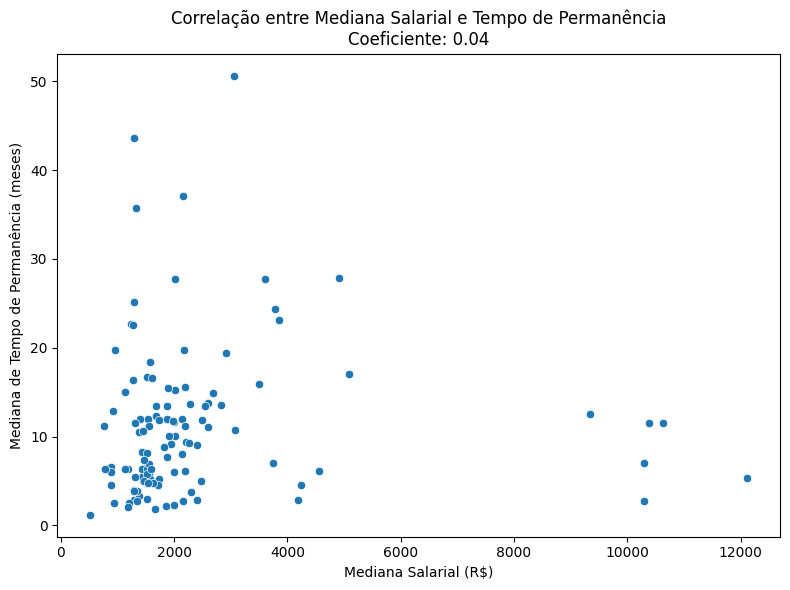

In [110]:
# Correlação numérica
correlacao = df_medianas_inativos[['mediana_salario', 'mediana_tempo']].corr().iloc[0, 1]
print(f"Correlação de Spearman: {correlacao:.2f}")

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_medianas_inativos,
    x='mediana_salario',
    y='mediana_tempo'
)
plt.title(f'Correlação entre Mediana Salarial e Tempo de Permanência\nCoeficiente: {correlacao:.2f}')
plt.xlabel('Mediana Salarial (R$)')
plt.ylabel('Mediana de Tempo de Permanência (meses)')
plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/corr_salario_tempo.png", dpi=300)  # Salva em alta resolução

plt.show()